 # Classifica√ß√£o de Sentimentos no Dataset "Restaurant Reviews" com o Modelo DistilBERT.

### Descri√ß√£o do Dataset

Nesse trabalho, ser√° analisado um dataset que cont√©m reviews de restaurantes europeus. O dataset inclui informa√ß√µes como o o nome do restaurante, o pa√≠s em que ele est√° localizado, o sentimento da avalia√ß√£o (positivo ou negativo), o t√≠tulo da avalia√ß√£o e o conte√∫do da avalia√ß√£o.

### Carregamento do Dataset



In [17]:
import pandas as pd
df=pd.read_csv("European Restaurant Reviews.csv")

 Visualiza√ß√£o do conte√∫do e da estrutura do dataset

In [18]:
df.head()

Country            Restaurant Name Sentiment  \
0  France  The Frog at Bercy Village  Negative   
1  France  The Frog at Bercy Village  Negative   
2  France  The Frog at Bercy Village  Negative   
3  France  The Frog at Bercy Village  Negative   
4  France  The Frog at Bercy Village  Negative   

                                Review Title Review Date  \
0                               Rude manager  May 2024 ‚Ä¢   
1                       A big disappointment  Feb 2024 ‚Ä¢   
2               Pretty Place with Bland Food  Nov 2023 ‚Ä¢   
3   Great service and wine but inedible food  Mar 2023 ‚Ä¢   
4  Avoid- Worst meal in Rome - possibly ever  Nov 2022 ‚Ä¢   

                                              Review  
0  The manager became agressive when I said the c...  
1  I ordered a beef fillet ask to be done medium,...  
2  This is an attractive venue with welcoming, al...  
3  Sadly I  used the high TripAdvisor rating too ...  
4  From the start this meal was bad- especially g...

Quantidade de observa√ß√µes, quantidade de dados ausentes e tipo de cada coluna

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country          1502 non-null   object
 1   Restaurant Name  1502 non-null   object
 2   Sentiment        1502 non-null   object
 3   Review Title     1502 non-null   object
 4   Review Date      1502 non-null   object
 5   Review           1502 non-null   object
dtypes: object(6)
memory usage: 70.5+ KB


Conclus√£o do carregamento

O Dataset possui 1502 observa√ß√µes com 6 colunas: Country (Pa√≠s), Restaurant Name (Nome do Restaurante), Review Title (T√≠tulo da Avalia√ß√£o), Review Date (Data da Avalia√ß√£o), Review (Avalia√ß√£o) e n√£o possui nenhum dado ausente em nenhuma das 6 colunas, portanto, n√£o ser√° necess√°ria nenhuma t√©cnica de pr√©-processamento para lidar com dados ausentes. Todas as colunas s√£o do tipo object (string).

### Informa√ß√µes do dataset

In [20]:
df.describe()

Country            Restaurant Name Sentiment Review Title Review Date  \
count     1502                       1502      1502         1502        1502   
unique       7                          7         2         1343         143   
top     France  The Frog at Bercy Village  Positive    Excellent  May 2014 ‚Ä¢   
freq       512                        512      1237            9         108   

                                                   Review  
count                                                1502  
unique                                               1426  
top     I'm afraid we were very let down by this resta...  
freq                                                    4

O dataset cont√©m dados de 7 restaurantes de 7 diferentes pa√≠ses.

Distribui√ß√£o de sentimentos

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

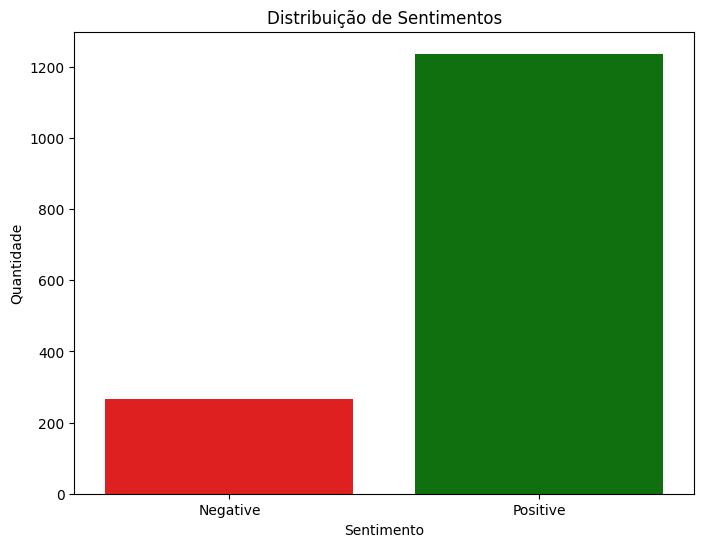

In [22]:
plt.figure(figsize=(8,6))
sns.countplot(x="Sentiment", data=df, hue="Sentiment" ,palette=['red', 'green'], legend=False) 
plt.title("Distribui√ß√£o de Sentimentos")
plt.xlabel("Sentimento")
plt.ylabel("Quantidade")
plt.show()

Das 1502 observa√ß√µes, 1237 s√£o positivas e 265 negativas.

M√©dia de tamanho da avalia√ß√£o de acordo com o sentimento

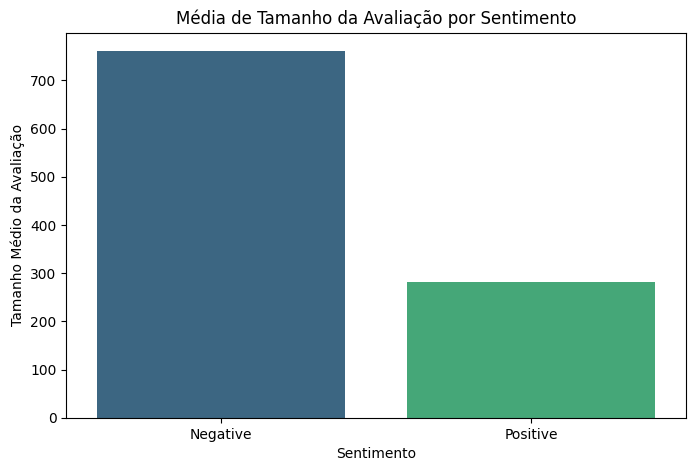

In [23]:
df['Review Length'] = df['Review'].apply(len)
avg_review_length = df.groupby('Sentiment')['Review Length'].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_review_length.index, y=avg_review_length.values, hue=avg_review_length.index,palette='viridis')
plt.title('M√©dia de Tamanho da Avalia√ß√£o por Sentimento')
plt.xlabel('Sentimento')
plt.ylabel('Tamanho M√©dio da Avalia√ß√£o')
plt.show()

Esse gr√°fico mostra que as avalia√ß√µes negativas tendem a ser muito mais longas do que as avalia√ß√µes positivas (As positivas costumam ter cerca de 300 caracteres, enquanto as positivas costumam ter cerca de 700 caracteres). Isso evidencia que, quando os clientes est√£o insatisfeitos, eles costumam avaliar de forma mais detalhada em compara√ß√£o a quando eles est√£o satisfeitos. Esse elemento pode ser utilizado pelo modelo de classifica√ß√£o de sentimentos para uma classifica√ß√£o mais precisa.

Quantidade de avalia√ß√µes separadas por pa√≠s

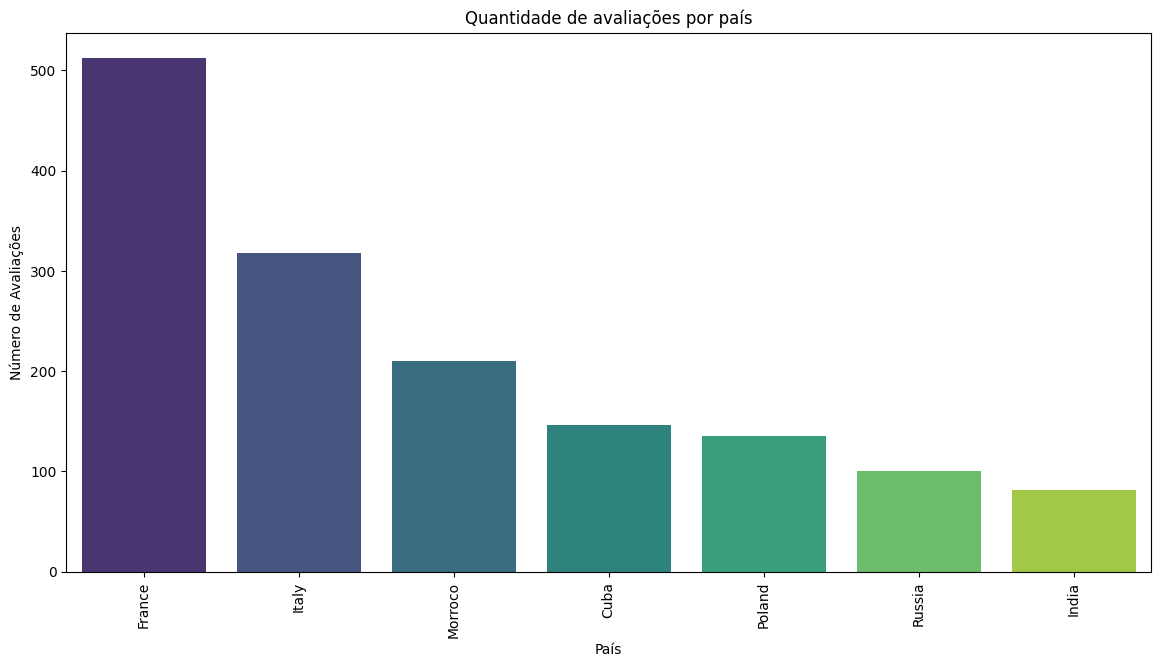

In [24]:
plt.figure(figsize=(14,7))
country_count=df["Country"].value_counts()
sns.barplot(x=country_count.index,y=country_count.values, hue=country_count.index, palette="viridis")
plt.title("Quantidade de avalia√ß√µes por pa√≠s")
plt.xlabel("Pa√≠s")
plt.ylabel("N√∫mero de Avalia√ß√µes")
plt.xticks(rotation=90)
plt.show()

In [25]:
# Para processamento de texto
import re
import nltk

# Para remover palavras comuns
from nltk.corpus import stopwords
nltk.download('stopwords')

# Para stemming - lematiza√ß√£o
from nltk.stem.porter import PorterStemmer

# Para tokeniza√ß√£o
from nltk.tokenize import word_tokenize ,sent_tokenize
nltk.download('punkt')

def limparTexto(text):
    # Convert to lowercase
    text = text.lower()
    # Remove commas
    text = re.sub(r',', '', text)
    # Remove single quotation marks
    text = re.sub(r'\'', '', text)
    # Remove double quotation marks
    text = re.sub(r'\"', '', text)
    # Remove opening parentheses 
    text = re.sub(r'\(', '', text)
    # Remove closing parentheses   
    text = re.sub(r'\)', '', text)
    # Remove newline characters
    text = re.sub(r'\n', '', text)
    # Remove left double quotation marks  
    text = re.sub(r'‚Äú', '', text)
    # Remove right double quotation marks
    text = re.sub(r'‚Äù', '', text)
    # Remove right single quotation marks
    text = re.sub(r'‚Äô', '', text)
    # Remove periods
    text = re.sub(r'\.', '', text)
    # Remove semicolons
    text = re.sub(r';', '', text)
    # Remove colons 
    text = re.sub(r':', '', text)
    # Remove hyphens 
    text = re.sub(r'\-', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Return the cleaned text
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/aderson/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/aderson/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [26]:
# Aplica limparTexto na coluna 'Review'
df['cleaned_review'] = df['Review'].apply(limparTexto)
df['cleaned_review']

0       the manager became agressive when i said the c...
1       i ordered a beef fillet ask to be done medium ...
2       this is an attractive venue with welcoming alb...
3       sadly i  used the high tripadvisor rating too ...
4       from the start this meal was bad especially gi...
                              ...                        
1497    despite the other reviews saying that this is ...
1498    beer is good  food is awfull  the only decent ...
1499    for terrible service of a truly comedic level ...
1500    we visited the havanas club museum which is lo...
1501    food and service was awful very pretty stop go...
Name: cleaned_review, Length: 1502, dtype: object

In [27]:
# Remove stop words
def Remove_stop_words(text):
    stop_words = set(stopwords.words('english'))
    words = [word for word in text.split() if word.lower() not in stop_words]
    text = ' '.join(words)
    return text

# Aplicar o Remove_stop_words na coluna 'cleaned_review' 
df['cleaned_review'] = df['cleaned_review'].apply(Remove_stop_words)

df.head(5)

Country            Restaurant Name Sentiment  \
0  France  The Frog at Bercy Village  Negative   
1  France  The Frog at Bercy Village  Negative   
2  France  The Frog at Bercy Village  Negative   
3  France  The Frog at Bercy Village  Negative   
4  France  The Frog at Bercy Village  Negative   

                                Review Title Review Date  \
0                               Rude manager  May 2024 ‚Ä¢   
1                       A big disappointment  Feb 2024 ‚Ä¢   
2               Pretty Place with Bland Food  Nov 2023 ‚Ä¢   
3   Great service and wine but inedible food  Mar 2023 ‚Ä¢   
4  Avoid- Worst meal in Rome - possibly ever  Nov 2022 ‚Ä¢   

                                              Review  Review Length  \
0  The manager became agressive when I said the c...            146   
1  I ordered a beef fillet ask to be done medium,...            281   
2  This is an attractive venue with welcoming, al...            260   
3  Sadly I  used the high TripAdvisor rating too ...           1513   
4  From the start this meal was bad- especially g...           1351   

                                      cleaned_review  
0  manager became agressive said carbonara good r...  
1  ordered beef fillet ask done medium got well d...  
2  attractive venue welcoming albeit somewhat slo...  
3  sadly used high tripadvisor rating literally f...  
4  start meal bad especially given price visited ...

In [28]:
# Tokenizar todas as frases do cleaned_version 
df['cleaned_review_tokens'] = df['cleaned_review'].apply(lambda x: x.split())
texts = df['cleaned_review_tokens'].apply(lambda tokens: ' '.join(tokens)).tolist()


Os pa√≠ses da parte central da Europa possuem uma quantidade maior de avalia√ß√µes, evidenciando uma poss√≠vel cultura culin√°ria mais forte nesses pa√≠ses.

Nuvem de palavras mais utilizadas em avalia√ß√µes positivas

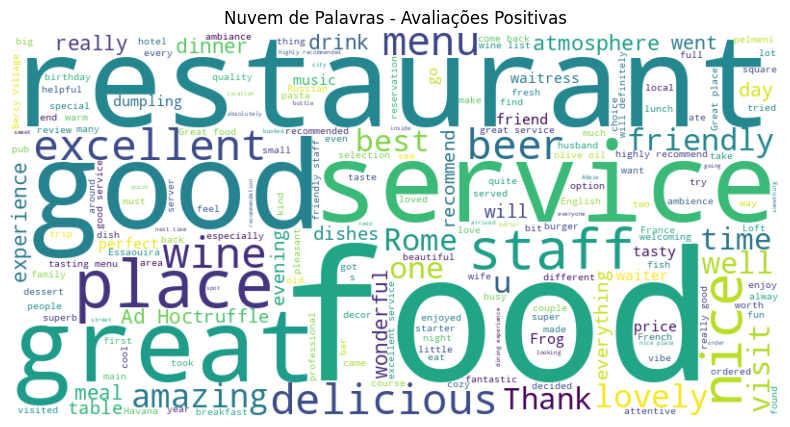

In [29]:
from wordcloud import WordCloud

positive_reviews = df[df['Sentiment'] == 'Positive']['Review'].str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Nuvem de Palavras - Avalia√ß√µes Positivas')
plt.axis('off')
plt.show()

Nuvem de palavras mais utilizadas em avalia√ß√µes negativas

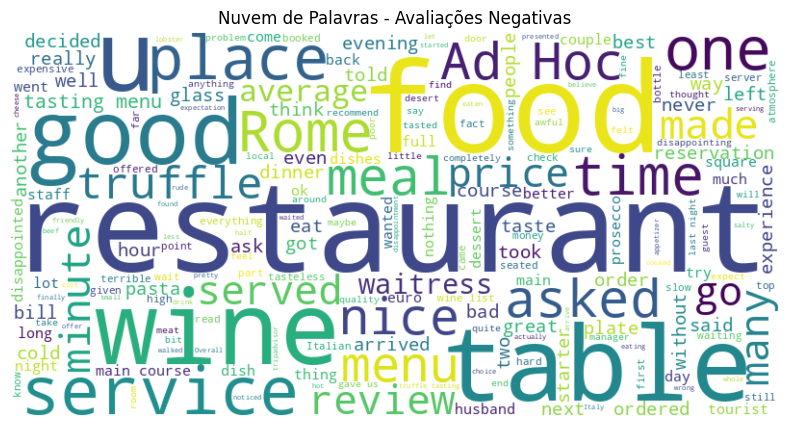

In [30]:
from wordcloud import WordCloud

positive_reviews = df[df['Sentiment'] == 'Negative']['Review'].str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Nuvem de Palavras - Avalia√ß√µes Negativas')
plt.axis('off')
plt.show()

As palavras mais frequentes para cada tipo de sentimento s√£o importantes informa√ß√µes para o modelo de linguagem classificar sentimentos com a maior acur√°cia poss√≠vel. Por√©m, algumas palavras podem estar igualmente presentes em grande quantidade em ambos os sentimentos, como a palavra "restaurante", por exemplo.

M√©dia de sentimentos ao longo do tempo

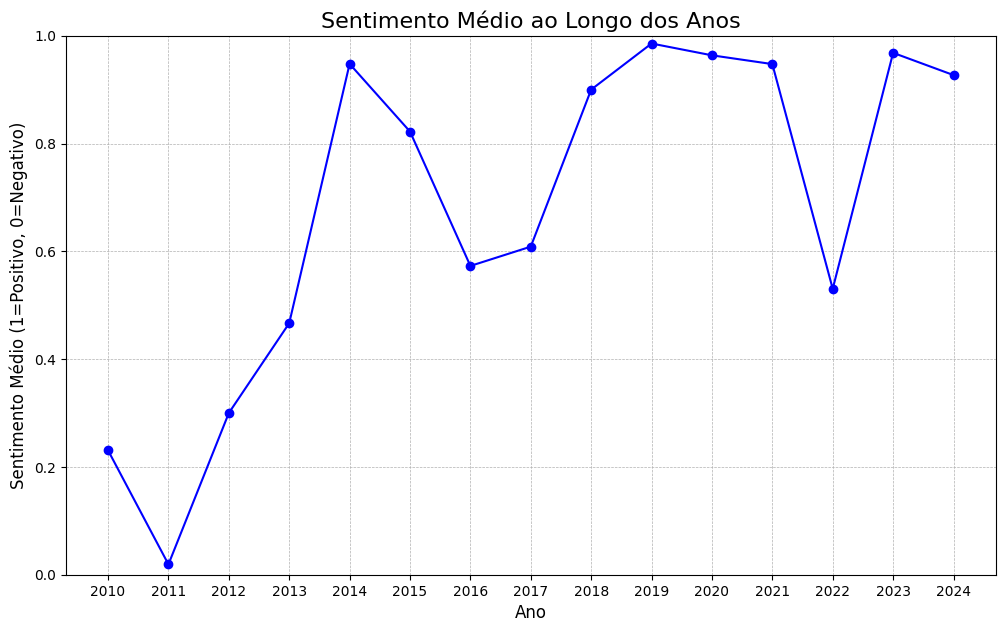

In [31]:
import re
import matplotlib.pyplot as plt
import pandas as pd

df_temp = df.copy()

# Extrair m√™s e ano (ex: "May 2024")
df_temp['Review Date'] = df_temp['Review Date'].str.extract(r'([A-Za-z]+\s+\d{4})')

# Corrigir abrevia√ß√£o n√£o padr√£o "Sept"
df_temp['Review Date'] = df_temp['Review Date'].str.replace('Sept', 'Sep')

# Converter para datetime (dia 1 por padr√£o)
df_temp['Review Date'] = pd.to_datetime(df_temp['Review Date'], format='%b %Y', errors='coerce')

# Mapear sentimentos para valores num√©ricos
df_temp['Sentiment_Value'] = df_temp['Sentiment'].map({'Positive': 1, 'Negative': 0})

# M√©dia de sentimento por ano
sentiment_by_year = df_temp.groupby(df_temp['Review Date'].dt.year)['Sentiment_Value'].mean()

# Plotar
plt.figure(figsize=(12, 7))
sentiment_by_year.plot(kind='line', marker='o', linestyle='-', color='b')

plt.title('Sentimento M√©dio ao Longo dos Anos', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Sentimento M√©dio (1=Positivo, 0=Negativo)', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(sentiment_by_year.index)
plt.ylim(0, 1)
plt.show()


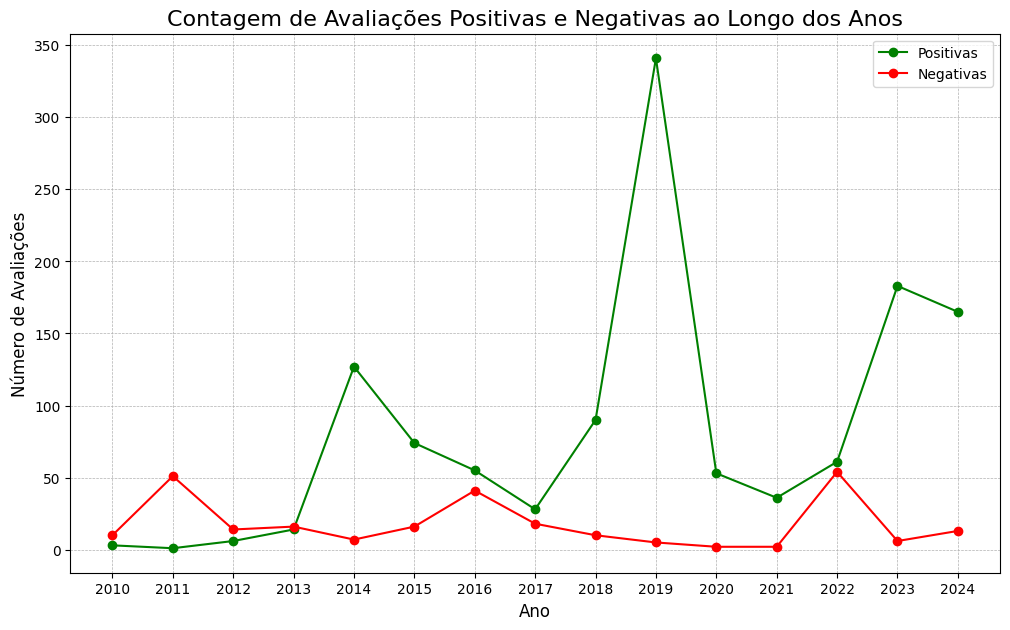

In [32]:
# 2. Extrair o ano para uma nova coluna
df_temp['Year'] = df_temp['Review Date'].dt.year

# 3. Agrupar por ano e sentimento e contar as ocorr√™ncias
# .size() conta o n√∫mero de linhas para cada grupo (ano, sentimento)
# .unstack() pivota a coluna 'Sentiment' para que 'Positive' e 'Negative' virem colunas separadas
sentiment_counts_by_year = df_temp.groupby(['Year', 'Sentiment']).size().unstack(fill_value=0)


plt.figure(figsize=(12, 7))
plt.plot(sentiment_counts_by_year.index, sentiment_counts_by_year['Positive'], marker='o', linestyle='-', color='g', label='Positivas')
plt.plot(sentiment_counts_by_year.index, sentiment_counts_by_year['Negative'], marker='o', linestyle='-', color='r', label='Negativas')
plt.title('Contagem de Avalia√ß√µes Positivas e Negativas ao Longo dos Anos', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('N√∫mero de Avalia√ß√µes', fontsize=12)
plt.xticks(sentiment_counts_by_year.index.astype(int)) # Garante que os anos sejam inteiros no eixo
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend() # Adiciona a legenda para identificar as linhas
plt.show()

In [33]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import os

texts = df['cleaned_review_tokens'].apply(lambda tokens: ' '.join(tokens)).tolist()

model_name = "tabularisai/multilingual-sentiment-analysis"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

def predict_sentiment(texts):
    # Processa em batches para evitar uso excessivo de mem√≥ria
    batch_size = 8
    sentiment_map = {0: "Muito Negativo", 1: "Negativo", 2: "Neutro", 3: "Positivo", 4: "Muito Positivo"}
    all_preds = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i+batch_size]
        inputs = tokenizer(batch_texts, return_tensors="pt", truncation=True, padding=True, max_length=512)
        with torch.no_grad():
            outputs = model(**inputs)
        probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
        preds = torch.argmax(probs, dim=-1).tolist()
        all_preds.extend([sentiment_map[p] for p in preds])
    return all_preds

resultados = predict_sentiment(texts)

for original, processed, sentiment in zip(df['Review'], texts, resultados):
    print(f"Texto original:\n{original}")
    print(f"Texto processado:\n{processed}")
    print(f"Sentimento: {sentiment}")
    print("-" * 80)


/home/aderson/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Texto original:
The manager became agressive when I said the carbonara was not good. She was rude. It was  a very bad experience. The worst in Rome in many years.
Texto processado:
manager became agressive said carbonara good rude bad experience worst rome many years
Sentimento: Muito Negativo
--------------------------------------------------------------------------------
Texto original:
I ordered a beef fillet ask to be done medium, I got it well done cooked and very dry, when I told them they took the steak and after 20 minutes they brought me another steak that was completely rare, I left all the steak , and they asked me about it but charged me the fool price.
Texto processado:
ordered beef fillet ask done medium got well done cooked dry told took steak 20 minutes brought another steak completely rare left steak asked charged fool price
Sentimento: Muito Negativo
--------------------------------------------------------------------------------
Texto original:
This is an attractive 